In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

In [3]:
import torch.nn as nn
import torch.nn.functional as F

In [4]:
import torch.optim as optim

In [5]:
from FRDEEP import FRDEEPF

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5],[0.5])])

In [7]:
trainset = FRDEEPF(root='./FIRST_data', train=True, download=True, transform=transform)  
batch_size_train = 2
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True, num_workers=2)

Files already downloaded and verified


In [8]:
testset = FRDEEPF(root='./FIRST_data', train=False, download=True, transform=transform) 
batch_size_test = 2
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test, shuffle=True, num_workers=2)

Files already downloaded and verified


In [9]:
classes = ('FRI', 'FRII')

In [10]:
def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [11]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

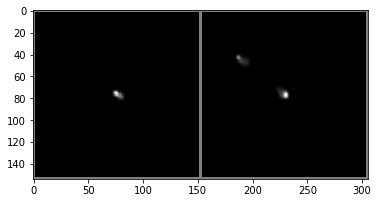

  FRI  FRII


In [12]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size_train)))

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 34 * 34, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # conv1 output width: input_width - (kernel_size - 1) => 150 - (5-1) = 146
        # pool 1 output width: int(input_width/2) => 73
        x = self.pool(F.relu(self.conv1(x)))
        # conv2 output width: input_width - (kernel_size - 1) => 73 - (5-1) = 69
        # pool 2 output width: int(input_width/2) => 34
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 16 * 34 * 34)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
net = Net()

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(), lr=0.01)

In [25]:
nepoch = 500  # number of epochs
print_num = 50
for epoch in range(nepoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % print_num == (print_num-1):    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / print_num))
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 0.002
[1,   100] loss: 0.020
[1,   150] loss: 0.000
[1,   200] loss: 0.004
[1,   250] loss: 0.004
[2,    50] loss: 0.014
[2,   100] loss: 0.006
[2,   150] loss: 0.004
[2,   200] loss: 0.001
[2,   250] loss: 0.003
[3,    50] loss: 0.007
[3,   100] loss: 0.009
[3,   150] loss: 0.001
[3,   200] loss: 0.004
[3,   250] loss: 0.009
[4,    50] loss: 0.006
[4,   100] loss: 0.001
[4,   150] loss: 0.004
[4,   200] loss: 0.010
[4,   250] loss: 0.008
[5,    50] loss: 0.001
[5,   100] loss: 0.004
[5,   150] loss: 0.002
[5,   200] loss: 0.003
[5,   250] loss: 0.027
[6,    50] loss: 0.002
[6,   100] loss: 0.004
[6,   150] loss: 0.013
[6,   200] loss: 0.001
[6,   250] loss: 0.000
[7,    50] loss: 0.003
[7,   100] loss: 0.002
[7,   150] loss: 0.006
[7,   200] loss: 0.004
[7,   250] loss: 0.002
[8,    50] loss: 0.019
[8,   100] loss: 0.002
[8,   150] loss: 0.008
[8,   200] loss: 0.004
[8,   250] loss: 0.008
[9,    50] loss: 0.001
[9,   100] loss: 0.002
[9,   150] loss: 0.001
[9,   200] 

[69,   250] loss: 0.008
[70,    50] loss: 0.001
[70,   100] loss: 0.004
[70,   150] loss: 0.002
[70,   200] loss: 0.000
[70,   250] loss: 0.001
[71,    50] loss: 0.003
[71,   100] loss: 0.000
[71,   150] loss: 0.001
[71,   200] loss: 0.005
[71,   250] loss: 0.005
[72,    50] loss: 0.008
[72,   100] loss: 0.002
[72,   150] loss: 0.004
[72,   200] loss: 0.001
[72,   250] loss: 0.000
[73,    50] loss: 0.002
[73,   100] loss: 0.006
[73,   150] loss: 0.001
[73,   200] loss: 0.005
[73,   250] loss: 0.001
[74,    50] loss: 0.002
[74,   100] loss: 0.001
[74,   150] loss: 0.001
[74,   200] loss: 0.000
[74,   250] loss: 0.002
[75,    50] loss: 0.002
[75,   100] loss: 0.004
[75,   150] loss: 0.000
[75,   200] loss: 0.001
[75,   250] loss: 0.003
[76,    50] loss: 0.000
[76,   100] loss: 0.001
[76,   150] loss: 0.001
[76,   200] loss: 0.002
[76,   250] loss: 0.005
[77,    50] loss: 0.004
[77,   100] loss: 0.000
[77,   150] loss: 0.001
[77,   200] loss: 0.006
[77,   250] loss: 0.001
[78,    50] loss

[136,   200] loss: 0.001
[136,   250] loss: 0.002
[137,    50] loss: 0.003
[137,   100] loss: 0.000
[137,   150] loss: 0.002
[137,   200] loss: 0.000
[137,   250] loss: 0.001
[138,    50] loss: 0.001
[138,   100] loss: 0.002
[138,   150] loss: 0.001
[138,   200] loss: 0.002
[138,   250] loss: 0.001
[139,    50] loss: 0.000
[139,   100] loss: 0.001
[139,   150] loss: 0.001
[139,   200] loss: 0.002
[139,   250] loss: 0.001
[140,    50] loss: 0.001
[140,   100] loss: 0.000
[140,   150] loss: 0.001
[140,   200] loss: 0.000
[140,   250] loss: 0.000
[141,    50] loss: 0.000
[141,   100] loss: 0.002
[141,   150] loss: 0.003
[141,   200] loss: 0.000
[141,   250] loss: 0.001
[142,    50] loss: 0.000
[142,   100] loss: 0.001
[142,   150] loss: 0.002
[142,   200] loss: 0.002
[142,   250] loss: 0.001
[143,    50] loss: 0.001
[143,   100] loss: 0.000
[143,   150] loss: 0.000
[143,   200] loss: 0.001
[143,   250] loss: 0.002
[144,    50] loss: 0.000
[144,   100] loss: 0.001
[144,   150] loss: 0.000


[202,   100] loss: 0.000
[202,   150] loss: 0.001
[202,   200] loss: 0.003
[202,   250] loss: 0.000
[203,    50] loss: 0.000
[203,   100] loss: 0.000
[203,   150] loss: 0.001
[203,   200] loss: 0.000
[203,   250] loss: 0.002
[204,    50] loss: 0.001
[204,   100] loss: 0.001
[204,   150] loss: 0.000
[204,   200] loss: 0.001
[204,   250] loss: 0.001
[205,    50] loss: 0.000
[205,   100] loss: 0.000
[205,   150] loss: 0.001
[205,   200] loss: 0.000
[205,   250] loss: 0.001
[206,    50] loss: 0.001
[206,   100] loss: 0.000
[206,   150] loss: 0.000
[206,   200] loss: 0.000
[206,   250] loss: 0.002
[207,    50] loss: 0.002
[207,   100] loss: 0.000
[207,   150] loss: 0.000
[207,   200] loss: 0.000
[207,   250] loss: 0.001
[208,    50] loss: 0.000
[208,   100] loss: 0.001
[208,   150] loss: 0.002
[208,   200] loss: 0.001
[208,   250] loss: 0.000
[209,    50] loss: 0.002
[209,   100] loss: 0.000
[209,   150] loss: 0.000
[209,   200] loss: 0.001
[209,   250] loss: 0.000
[210,    50] loss: 0.001


[267,   250] loss: 0.000
[268,    50] loss: 0.000
[268,   100] loss: 0.002
[268,   150] loss: 0.000
[268,   200] loss: 0.001
[268,   250] loss: 0.000
[269,    50] loss: 0.000
[269,   100] loss: 0.001
[269,   150] loss: 0.000
[269,   200] loss: 0.000
[269,   250] loss: 0.000
[270,    50] loss: 0.000
[270,   100] loss: 0.000
[270,   150] loss: 0.001
[270,   200] loss: 0.001
[270,   250] loss: 0.001
[271,    50] loss: 0.001
[271,   100] loss: 0.001
[271,   150] loss: 0.000
[271,   200] loss: 0.000
[271,   250] loss: 0.000
[272,    50] loss: 0.000
[272,   100] loss: 0.000
[272,   150] loss: 0.000
[272,   200] loss: 0.001
[272,   250] loss: 0.000
[273,    50] loss: 0.000
[273,   100] loss: 0.001
[273,   150] loss: 0.001
[273,   200] loss: 0.000
[273,   250] loss: 0.000
[274,    50] loss: 0.000
[274,   100] loss: 0.001
[274,   150] loss: 0.000
[274,   200] loss: 0.001
[274,   250] loss: 0.001
[275,    50] loss: 0.000
[275,   100] loss: 0.002
[275,   150] loss: 0.000
[275,   200] loss: 0.000


[333,   150] loss: 0.000
[333,   200] loss: 0.000
[333,   250] loss: 0.000
[334,    50] loss: 0.000
[334,   100] loss: 0.000
[334,   150] loss: 0.001
[334,   200] loss: 0.000
[334,   250] loss: 0.001
[335,    50] loss: 0.000
[335,   100] loss: 0.000
[335,   150] loss: 0.001
[335,   200] loss: 0.001
[335,   250] loss: 0.000
[336,    50] loss: 0.000
[336,   100] loss: 0.000
[336,   150] loss: 0.001
[336,   200] loss: 0.000
[336,   250] loss: 0.000
[337,    50] loss: 0.000
[337,   100] loss: 0.000
[337,   150] loss: 0.000
[337,   200] loss: 0.001
[337,   250] loss: 0.000
[338,    50] loss: 0.000
[338,   100] loss: 0.000
[338,   150] loss: 0.000
[338,   200] loss: 0.001
[338,   250] loss: 0.000
[339,    50] loss: 0.001
[339,   100] loss: 0.001
[339,   150] loss: 0.000
[339,   200] loss: 0.000
[339,   250] loss: 0.000
[340,    50] loss: 0.000
[340,   100] loss: 0.000
[340,   150] loss: 0.000
[340,   200] loss: 0.000
[340,   250] loss: 0.001
[341,    50] loss: 0.000
[341,   100] loss: 0.001


[399,    50] loss: 0.000
[399,   100] loss: 0.000
[399,   150] loss: 0.000
[399,   200] loss: 0.000
[399,   250] loss: 0.000
[400,    50] loss: 0.000
[400,   100] loss: 0.001
[400,   150] loss: 0.000
[400,   200] loss: 0.000
[400,   250] loss: 0.000
[401,    50] loss: 0.000
[401,   100] loss: 0.000
[401,   150] loss: 0.000
[401,   200] loss: 0.000
[401,   250] loss: 0.001
[402,    50] loss: 0.000
[402,   100] loss: 0.000
[402,   150] loss: 0.000
[402,   200] loss: 0.000
[402,   250] loss: 0.000
[403,    50] loss: 0.000
[403,   100] loss: 0.000
[403,   150] loss: 0.000
[403,   200] loss: 0.000
[403,   250] loss: 0.001
[404,    50] loss: 0.000
[404,   100] loss: 0.000
[404,   150] loss: 0.000
[404,   200] loss: 0.000
[404,   250] loss: 0.001
[405,    50] loss: 0.000
[405,   100] loss: 0.000
[405,   150] loss: 0.000
[405,   200] loss: 0.000
[405,   250] loss: 0.000
[406,    50] loss: 0.000
[406,   100] loss: 0.000
[406,   150] loss: 0.001
[406,   200] loss: 0.000
[406,   250] loss: 0.000


[464,   200] loss: 0.000
[464,   250] loss: 0.000
[465,    50] loss: 0.000
[465,   100] loss: 0.000
[465,   150] loss: 0.000
[465,   200] loss: 0.000
[465,   250] loss: 0.001
[466,    50] loss: 0.000
[466,   100] loss: 0.000
[466,   150] loss: 0.000
[466,   200] loss: 0.000
[466,   250] loss: 0.000
[467,    50] loss: 0.000
[467,   100] loss: 0.000
[467,   150] loss: 0.000
[467,   200] loss: 0.000
[467,   250] loss: 0.001
[468,    50] loss: 0.000
[468,   100] loss: 0.000
[468,   150] loss: 0.001
[468,   200] loss: 0.000
[468,   250] loss: 0.000
[469,    50] loss: 0.000
[469,   100] loss: 0.000
[469,   150] loss: 0.000
[469,   200] loss: 0.000
[469,   250] loss: 0.000
[470,    50] loss: 0.000
[470,   100] loss: 0.000
[470,   150] loss: 0.000
[470,   200] loss: 0.000
[470,   250] loss: 0.000
[471,    50] loss: 0.000
[471,   100] loss: 0.000
[471,   150] loss: 0.000
[471,   200] loss: 0.000
[471,   250] loss: 0.001
[472,    50] loss: 0.000
[472,   100] loss: 0.000
[472,   150] loss: 0.000


In [18]:
dataiter = iter(testloader)
images, labels = dataiter.next()

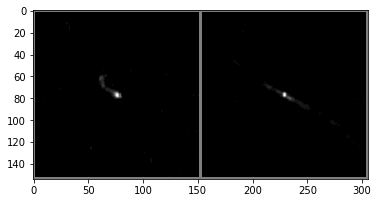

GroundTruth:    FRI   FRI


In [19]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size_test)))

In [20]:
outputs = net(images)


In [21]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(batch_size_test)))

Predicted:    FRI   FRI


In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 50 test images: 78 %


In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size_test):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

In [24]:
for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of   FRI : 72 %
Accuracy of  FRII : 82 %
